<a href="https://colab.research.google.com/github/okanars/HousePricePredictionwithRegression/blob/main/HousePricePredictionwithLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv("/content/drive/MyDrive/HousingPrices-Amsterdam-August-2021.csv")

**Analyzing and Visualizing Data**

In [25]:
# Browse the first few lines of data
data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [26]:
# See basic statistical information of the data
print(data.describe())

       Unnamed: 0         Price        Area        Room         Lon  \
count  924.000000  9.200000e+02  924.000000  924.000000  924.000000   
mean   462.500000  6.220654e+05   95.952381    3.571429    4.888605   
std    266.880123  5.389942e+05   57.447436    1.592332    0.053140   
min      1.000000  1.750000e+05   21.000000    1.000000    4.644819   
25%    231.750000  3.500000e+05   60.750000    3.000000    4.855834   
50%    462.500000  4.670000e+05   83.000000    3.000000    4.886818   
75%    693.250000  7.000000e+05  113.000000    4.000000    4.922337   
max    924.000000  5.950000e+06  623.000000   14.000000    5.029122   

              Lat  
count  924.000000  
mean    52.363326  
std      0.024028  
min     52.291519  
25%     52.352077  
50%     52.364631  
75%     52.377598  
max     52.423805  


In [27]:
# Check for missing values in the data
print(data.isnull().sum())

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64


In [28]:
# Remove rows with missing values and update the data
data_cleaned = data.dropna(subset=['Price'])

In [29]:
print(data_cleaned.isnull().sum())

Unnamed: 0    0
Address       0
Zip           0
Price         0
Area          0
Room          0
Lon           0
Lat           0
dtype: int64


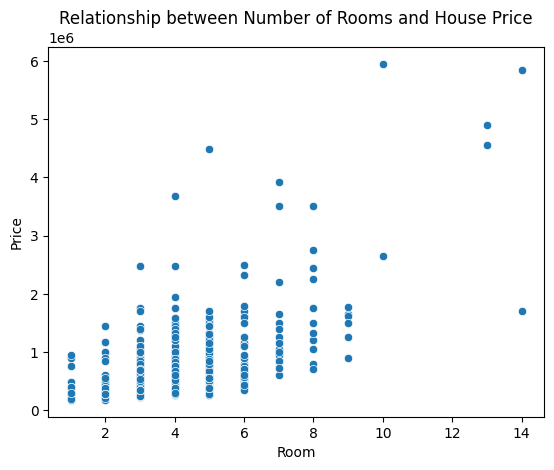

In [30]:
# Visualize the relationship between 'Price' and 'Number of Rooms'
sns.scatterplot(x='Room', y='Price', data=data_cleaned)
plt.title("Relationship between Number of Rooms and House Price")
plt.show()

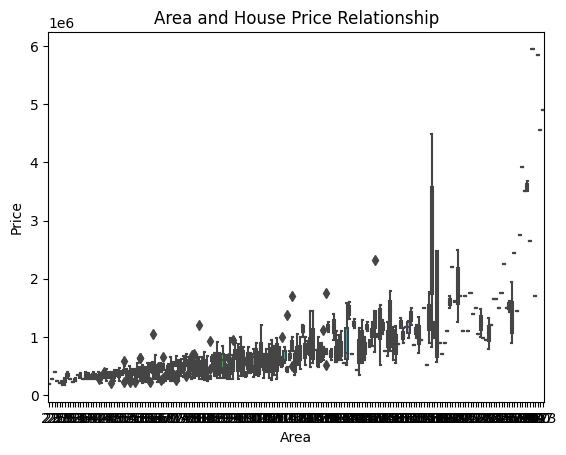

In [31]:
# Visualization the relationship between 'Area' and 'Price'
sns.boxplot(x='Area', y='Price', data=data_cleaned)
plt.title("Area and House Price Relationship")
plt.show()

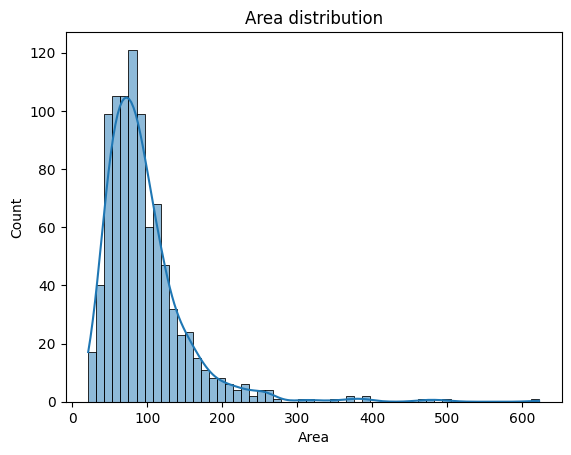

In [32]:
sns.histplot(data_cleaned['Area'], kde=True)
plt.title("Area distribution")
plt.show()

<ipython-input-33-92ee2471051f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_cleaned.corr()


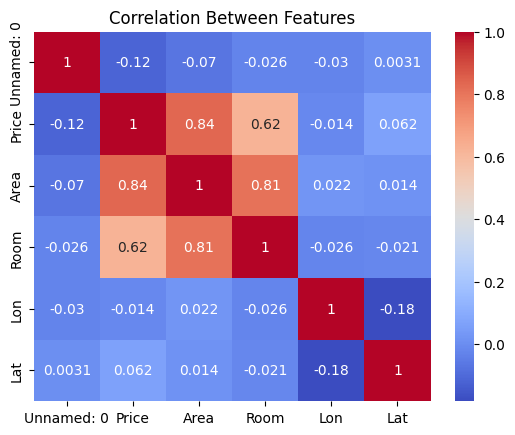

In [33]:
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()

In [34]:
data_necessary = data_cleaned.drop(columns=['Unnamed: 0', 'Address', 'Zip'])
X = data_necessary.drop(columns=['Price'])
y = data_necessary['Price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
print('Linear Regression MSE:', lr_mse)

Linear Regression MSE: 60958225226.28521


In [52]:
r2_score = lr_model.score(X_test, y_test)
print('R^2 Score:', r2_score)

R^2 Score: 0.7998106641653243
